In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df= pd.read_csv("E:\FWI\myenv\FWI Dataset.csv")


In [3]:
df.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia


In [4]:
df.tail(3)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [5]:
# Data types
df['DC'] = df['DC'].astype(str).str.replace(' ', '', regex=False)
df['FWI'] = df['FWI'].astype(str).str.replace(' ', '', regex=False)


df['DC'] = pd.to_numeric(df['DC'], errors='coerce')
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [7]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [8]:
#Data Exploration and Data Preprocessing
#step 1: Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

In [9]:
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values: \n",rows_with_missing)

Rows with missing values: 
      day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC     DC   ISI  \
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.69  12.5   

      BUI  FWI Classes            Region  
165  10.4  NaN       NaN  Sidi-Bel Abbes  


In [10]:
df.columns = df.columns.str.strip()
df["Classes"] = df["Classes"].fillna(df["Classes"].mode()[0])

In [11]:
print("Missing values in each column after filling 'Classes':")
df.isnull().sum()

Missing values in each column after filling 'Classes':


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        0
Region         0
dtype: int64

In [12]:
print("Number of duplicate rows in the dataset:")
df.duplicated().sum()

Number of duplicate rows in the dataset:


np.int64(0)

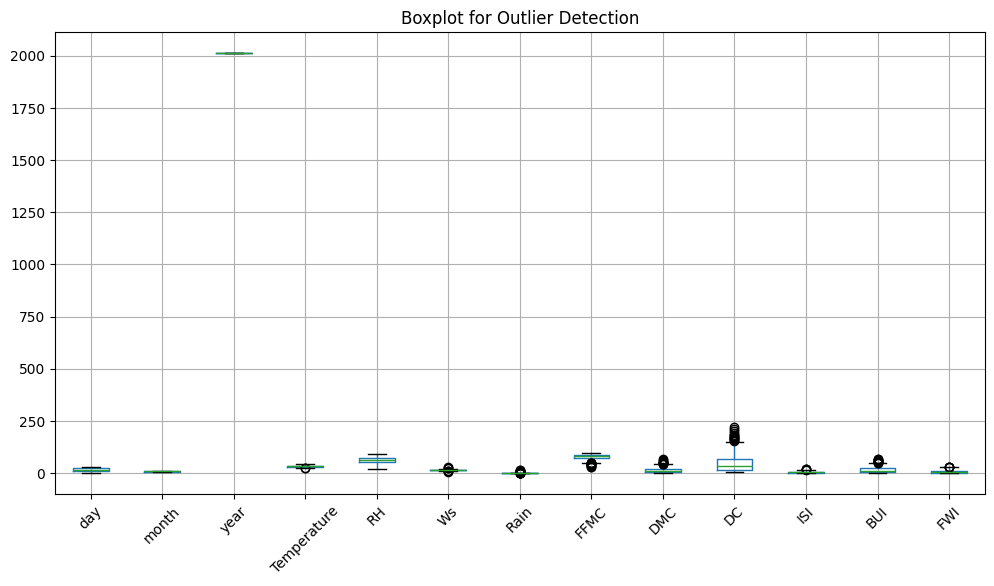

In [13]:
#step 2: Outlier Detection using Boxplots
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [14]:
#statistical threshold
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check number of outliers in each numerical column
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Column: {col} → Number of outliers: {len(outliers)}")

Column: day → Number of outliers: 0
Column: month → Number of outliers: 0
Column: year → Number of outliers: 0
Column: Temperature → Number of outliers: 2
Column: RH → Number of outliers: 0
Column: Ws → Number of outliers: 8
Column: Rain → Number of outliers: 35
Column: FFMC → Number of outliers: 16
Column: DMC → Number of outliers: 12
Column: DC → Number of outliers: 15
Column: ISI → Number of outliers: 4
Column: BUI → Number of outliers: 12
Column: FWI → Number of outliers: 4


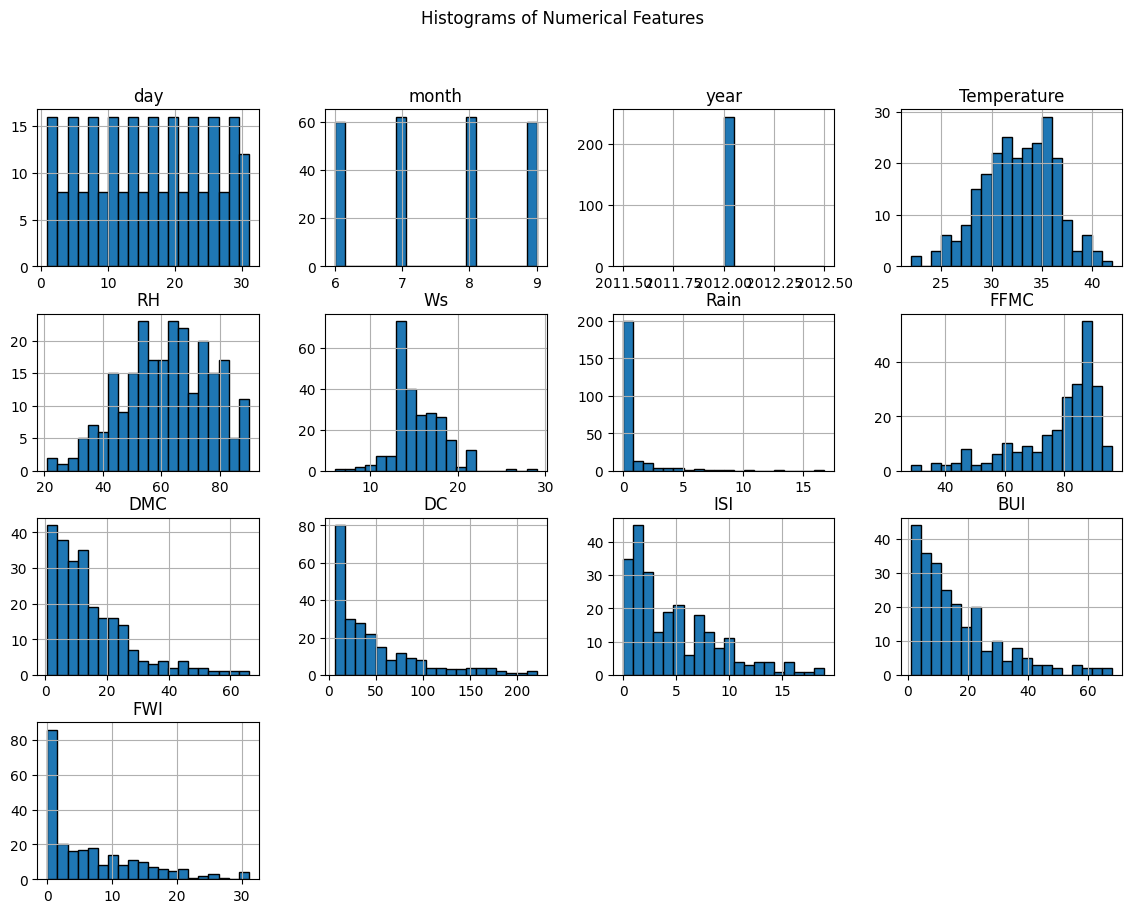

In [15]:
#step 3: Visualizations
#Histograms
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()


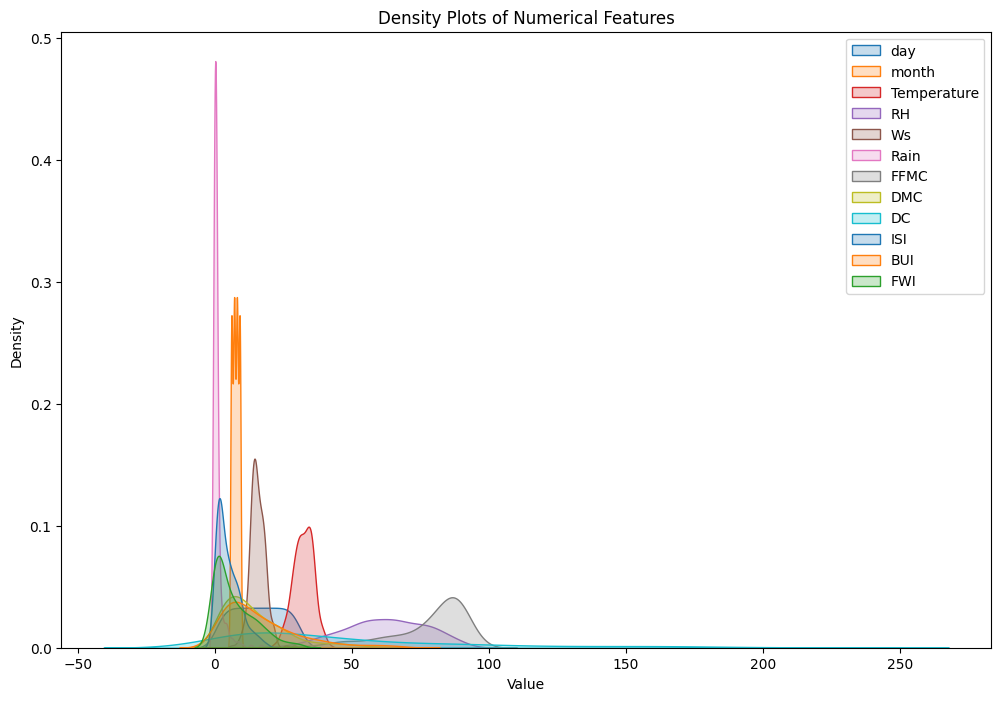

In [16]:
# Density Plots
plt.figure(figsize=(12, 8))

for col in num_cols:
    sns.kdeplot(df[col], label=col, fill=True)

plt.title("Density Plots of Numerical Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

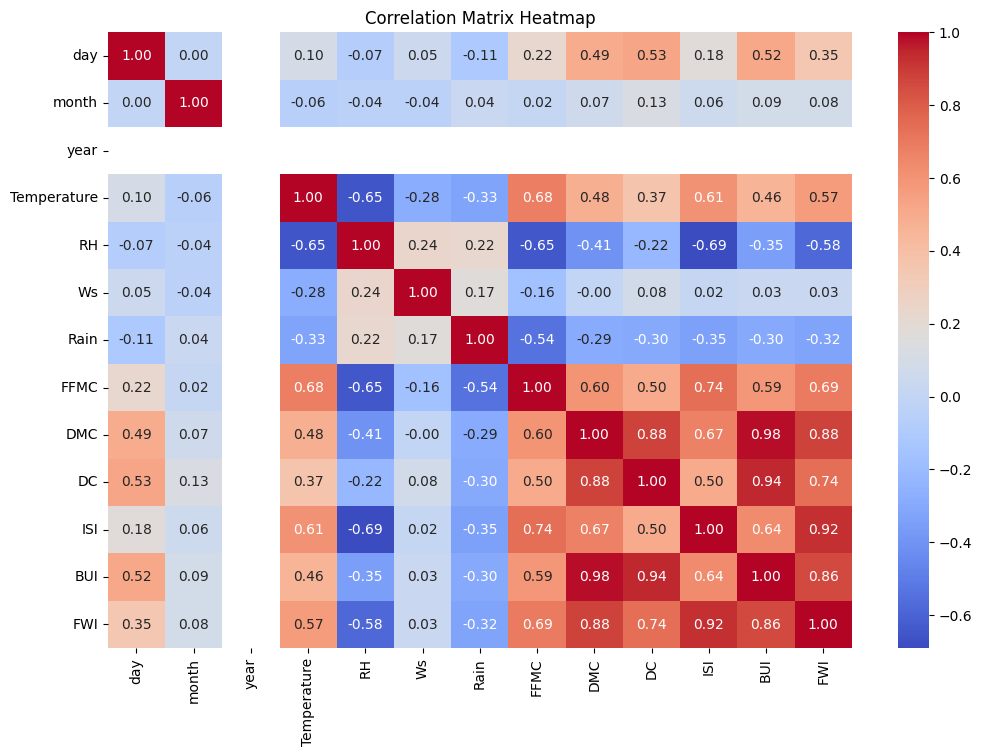

In [17]:
#step 4: Correlation Matrix 
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

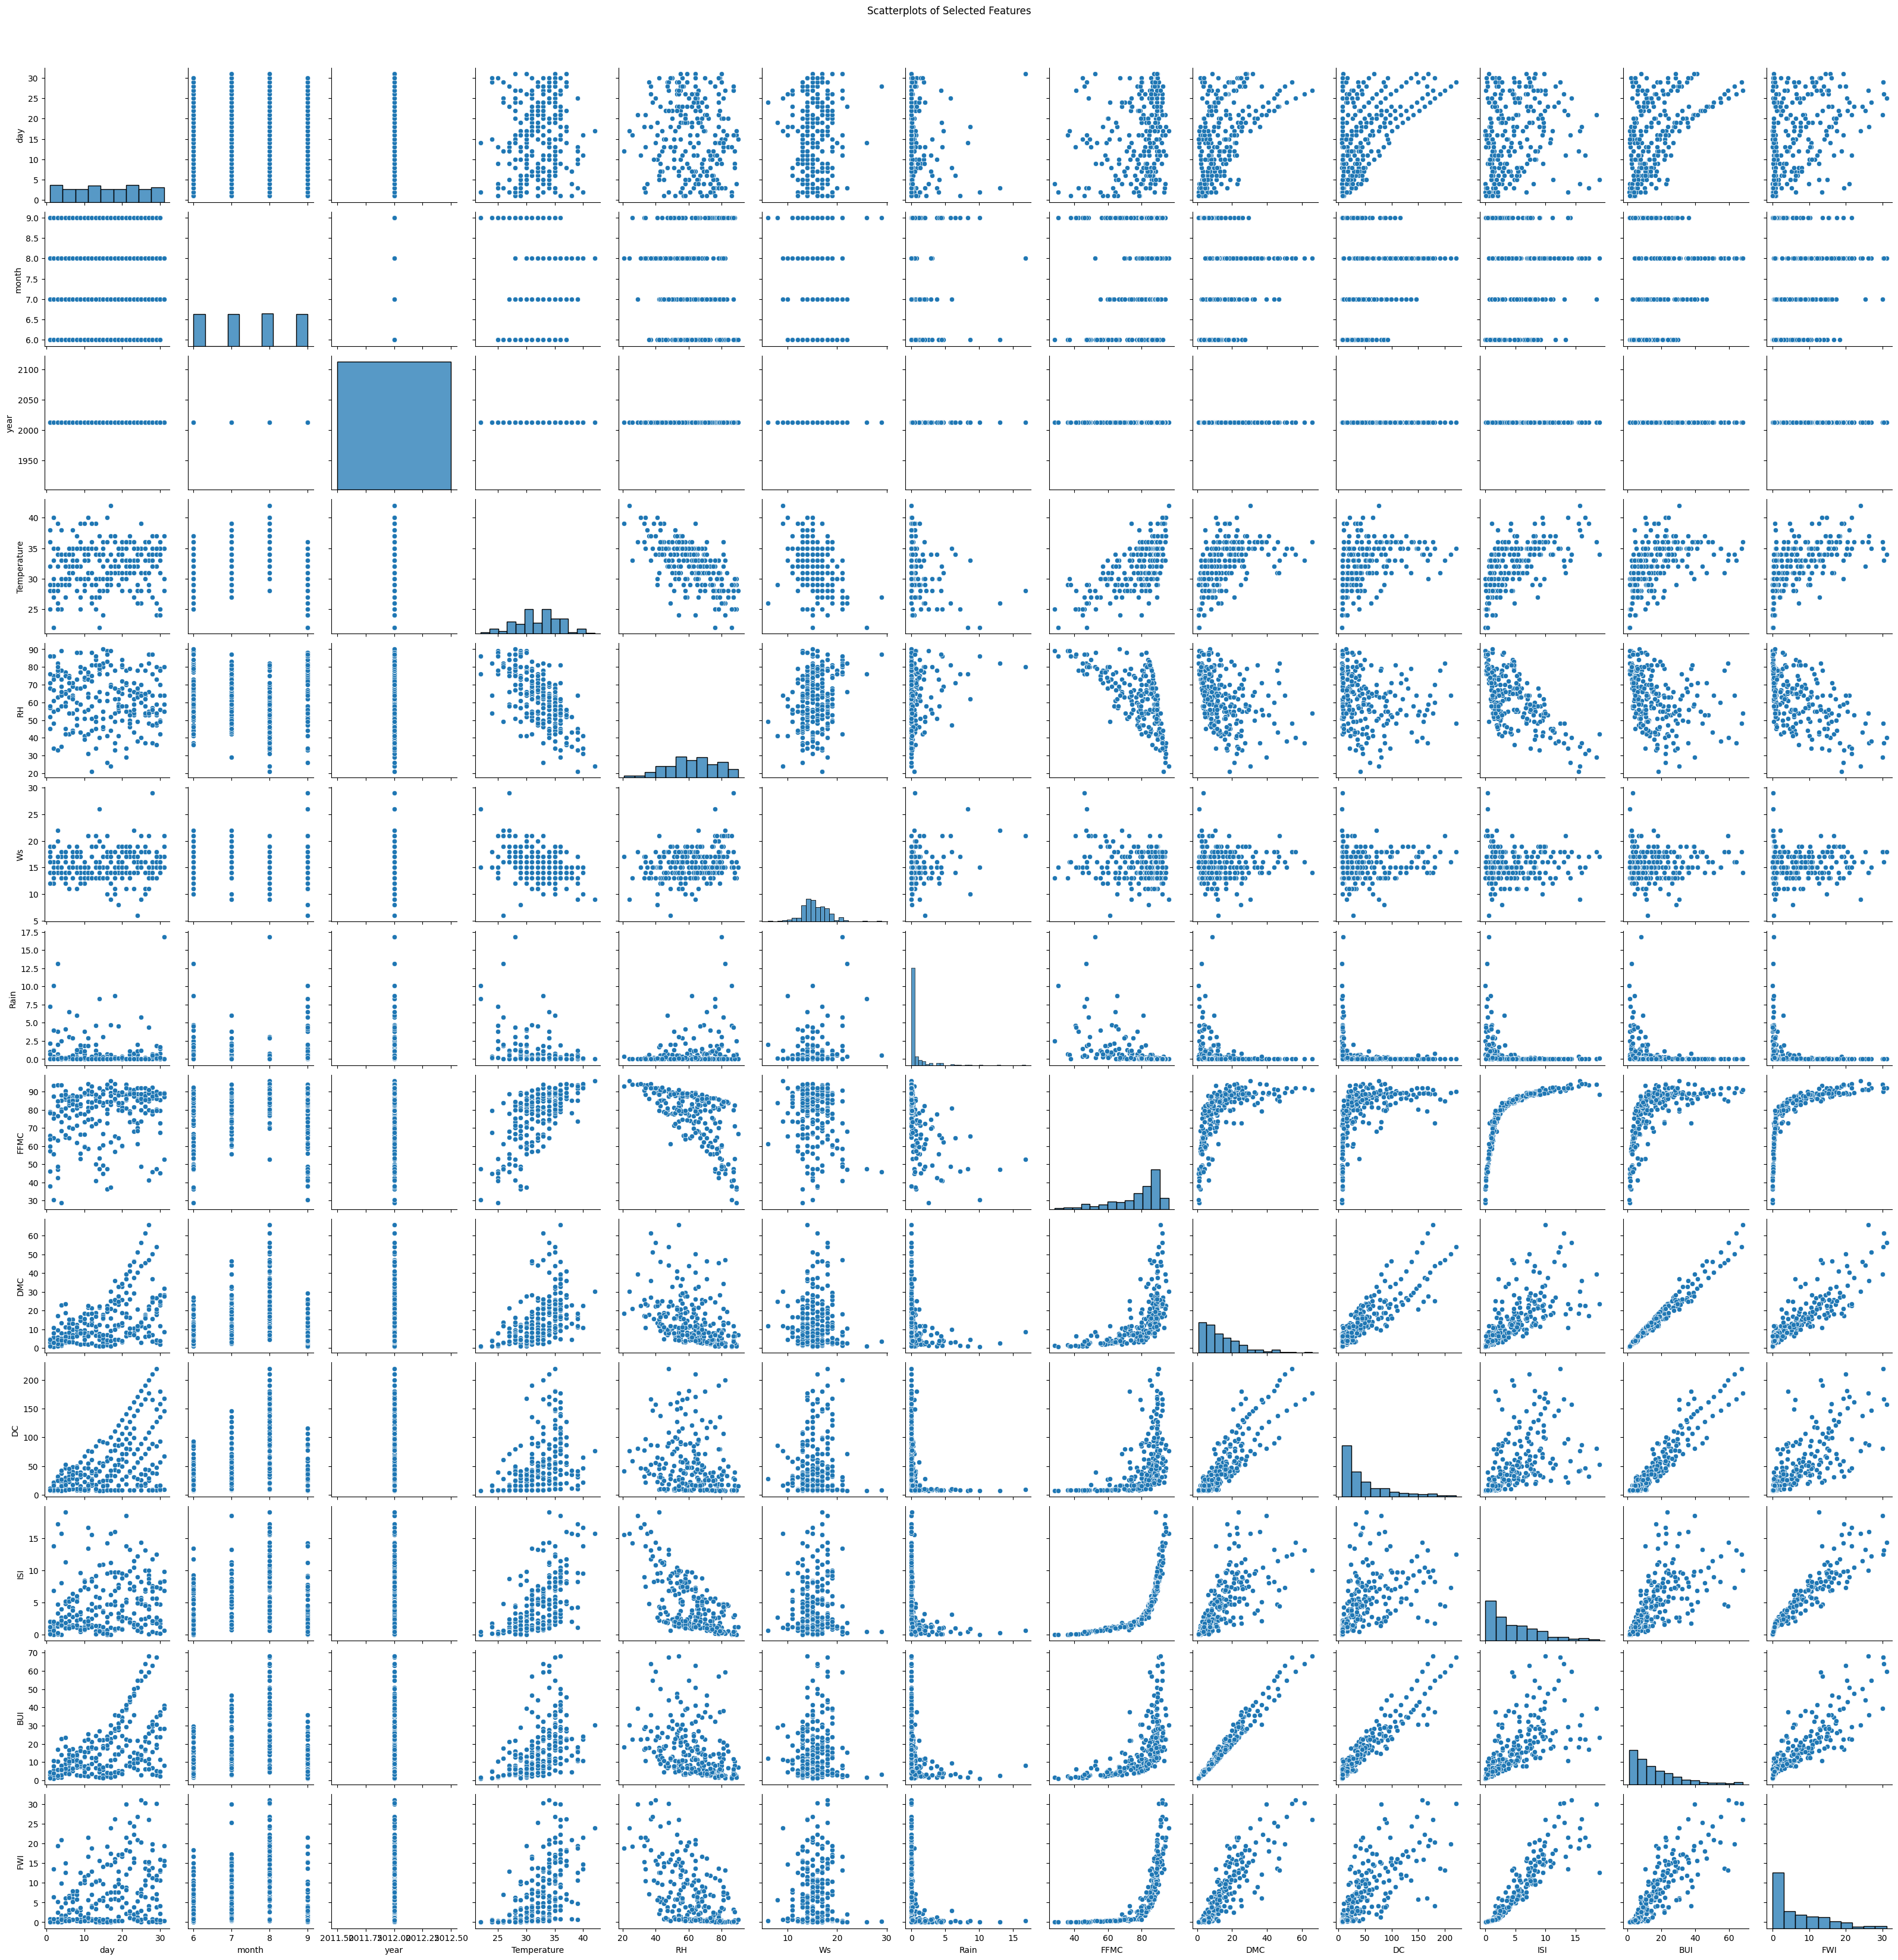

In [18]:
# Scatterplots of Selected Features
sns.pairplot(df[num_cols].dropna())
plt.suptitle("Scatterplots of Selected Features", y=1.02)
plt.show()

In [19]:
#step 5: Encoding Categorical Variables
df.columns = df.columns.str.strip()

print("Unique values in Region:", df['Region'].unique())
le = LabelEncoder()

df['Region_encoded'] = le.fit_transform(df['Region'])
df[['Region', 'Region_encoded']].head()

Unique values in Region: ['Bejaia' 'Sidi-Bel Abbes']


,Region,Region_encoded
0,Bejaia,0
1,Bejaia,0
2,Bejaia,0
3,Bejaia,0
4,Bejaia,0


In [20]:
#Mapping of regions
print("\nRegion Mapping:")
region_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(region_mapping)
df['Region_encoded'] = df['Region_encoded'].astype('category')
print(df[['Region', 'Region_encoded']].dtypes)


Region Mapping:
{'Bejaia': np.int64(0), 'Sidi-Bel Abbes': np.int64(1)}
Region              object
Region_encoded    category
dtype: object


In [21]:
#step 6:saved the cleaned dataset
df.to_csv("E:/FWI/myenv/FWI_Cleaned_Dataset.csv", index=False)
print("Cleaned dataset saved as FWI_Cleaned_Dataset.csv")


Cleaned dataset saved as FWI_Cleaned_Dataset.csv


# MileStone 2

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv("E:\FWI\myenv\FWI_Cleaned_Dataset.csv")

In [23]:
#Module 3:Feature Engineering and Scaling
#Step 1:Select numerical columns
df = df.dropna()
corr = df.corr(numeric_only=True)['FWI'].abs()

selected_features = corr[corr > 0.3].index.tolist()

selected_features.remove('FWI')

if 'day' in selected_features:
    selected_features.remove('day')

if 'Ws' not in selected_features:
    selected_features.append('Ws')

X = df[selected_features]
y = df['FWI']

print("selected features:")
print(X.columns.tolist())

selected features:
['Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Ws']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:

X_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)

print("\nScaled Feature Summary:\n")
print(X_scaled_df.describe())


Scaled Feature Summary:

        Temperature            RH          Rain          FFMC           DMC  \
count  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02   
mean  -3.021638e-16  1.922860e-16  5.379431e-17 -1.327689e-16 -7.325183e-17   
std    1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00   
min   -2.796647e+00 -2.722316e+00 -3.801557e-01 -3.514355e+00 -1.095782e+00   
25%   -6.012013e-01 -6.540988e-01 -3.801557e-01 -4.968853e-01 -7.204398e-01   
50%    2.220908e-01  7.978492e-02 -3.801557e-01  3.835060e-01 -3.067969e-01   
75%    7.709523e-01  7.469519e-01 -1.520870e-01  7.669022e-01  4.841035e-01   
max    2.691967e+00  1.881136e+00  7.686274e+00  1.270997e+00  3.883252e+00   

                 DC           ISI           BUI            Ws  
count  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  
mean   9.614302e-17 -4.921607e-17 -9.156479e-17  1.671057e-16  
std    1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  
min   

In [26]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [27]:
print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)

Training data shape: (194, 9)
Testing data shape: (49, 9)


In [28]:
#Module 4: Model Training using Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression MAE: {mae:.4f}")
print(f"Ridge Regression R2 Score: {r2:.4f}")
# Save the tuned model
with open("ridge.pkl", "wb") as f:
    pickle.dump(ridge, f)
print("Tuned Ridge model saved as ridge.pkl")

Ridge Regression MAE: 0.4769
Ridge Regression R2 Score: 0.9814
Tuned Ridge model saved as ridge.pkl


In [29]:
# Model Comparison
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

# Results
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
               Model       MAE      RMSE        R2
0  Linear Regression  0.424018  0.596185  0.988273
1   Lasso Regression  0.548091  0.733245  0.982261
2         ElasticNet  0.719575  1.014471  0.966044
3      Decision Tree  0.912245  1.635137  0.911784
4      Random Forest  0.546714  0.833029  0.977104


## MileStone 3

In [30]:
# Module 5
# Training and Testing Accuracy of Ridge Regression
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)
print(f"Training Accuracy (R² Score): {train_accuracy:.4f}")
print(f"Testing Accuracy  (R² Score): {test_accuracy:.4f}")

Training Accuracy (R² Score): 0.9729
Testing Accuracy  (R² Score): 0.9814


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics")
print("MAE :", train_mae)
print("RMSE:", train_rmse)
print("R²  :", train_r2)

print("\nTesting Metrics")
print("MAE :", test_mae)
print("RMSE:", test_rmse)
print("R²  :", test_r2)


Training Metrics
MAE : 0.6793297885894147
RMSE: 1.2815126950299722
R²  : 0.972931326425548

Testing Metrics
MAE : 0.4769024031723181
RMSE: 0.7513475825725479
R²  : 0.9813740484635797


In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    
    model.fit(X_train, y_train) 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results.append([name, train_r2, test_r2, mae, rmse])

# Results DataFrame
results_df = pd.DataFrame(
    results,
    columns=['Model', 'Train R2', 'Test R2', 'MAE', 'RMSE']
)

print("Model Comparison Results:")
results_df


Model Comparison Results:


,Model,Train R2,Test R2,MAE,RMSE
0,Linear Regression,0.973084,0.988273,0.424018,0.596185
1,Lasso Regression,0.972916,0.986094,0.446964,0.649201
2,ElasticNet,0.972959,0.985592,0.453632,0.660809
3,Decision Tree,1.000000,0.911784,0.912245,1.635137
4,Random Forest,0.996727,0.977309,0.539816,0.829291


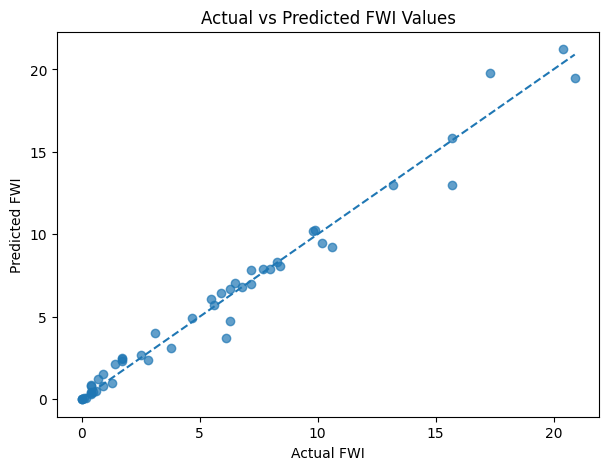

In [33]:
# Actual vs Predicted Plot 

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred,alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI Values")
plt.show()

In [34]:
# Hyperparameter tuning for Ridge Regression alpha

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Retrain model with best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Ridge Regression MAE: {mae:.4f}")
print(f"Tuned Ridge Regression R2 Score: {r2:.4f}")

# Save the tuned model
with open("ridge_tuned.pkl", "wb") as f:
    pickle.dump(ridge_model, f)
print("Tuned Ridge model saved as ridge_tuned.pkl")

Best Alpha: 10
Tuned Ridge Regression MAE: 0.6771
Tuned Ridge Regression R2 Score: 0.9677
Tuned Ridge model saved as ridge_tuned.pkl
